<a href="https://colab.research.google.com/github/RahmadYusuf/PRAKTIKUM_KB/blob/main/2309106091_Rahmad_Yusuf_Saputra_POSTTEST4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('academic Stress level.csv')
df.head()


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [2]:
df['Study Environment'].fillna('Unknown', inplace=True)
df.isnull().sum()

/tmp/ipython-input-3822831360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study Environment'].fillna('Unknown', inplace=True)


,0
Timestamp,0
Your Academic Stage,0
Peer pressure,0
Academic pressure from your home,0
Study Environment,0
What coping strategy you use as a student?,0
"Do you have any bad habits like smoking, drinking on a daily basis?",0
What would you rate the academic competition in your student life,0
Rate your academic stress index,0


In [3]:
df.apply(lambda x: x.unique())

,0
Timestamp,"[24/07/2025 22:05:39, 24/07/2025 22:05:52, 24/..."
Your Academic Stage,"[undergraduate, high school, post-graduate]"
Peer pressure,"[4, 3, 1, 5, 2]"
Academic pressure from your home,"[5, 4, 1, 2, 3]"
Study Environment,"[Noisy, Peaceful, disrupted, Unknown]"
What coping strategy you use as a student?,[Analyze the situation and handle it with inte...
"Do you have any bad habits like smoking, drinking on a daily basis?","[No, prefer not to say, Yes]"
What would you rate the academic competition in your student life,"[3, 2, 4, 5, 1]"
Rate your academic stress index,"[5, 3, 4, 2, 1]"


Disini kita hapus bagain tanggal waktu agar bisa fokus ke label laiinya.Dan kita encodingkan pada label teks menjadi angka.jadi saya menggunakan regresi

In [4]:
from sklearn.preprocessing import LabelEncoder

# Hapus kolom Timestamp karena tidak relevan
df = df.drop('Timestamp', axis=1)

# Kolom teks yang perlu di-label encode
cols_to_encode = [
    'Your Academic Stage',
    'Study Environment',
    'What coping strategy you use as a student?',
    'Do you have any bad habits like smoking, drinking on a daily basis?'
]

le_dict = {}
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

df.head()


,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,2,4,5,0,0,0,3,5
1,2,3,4,1,0,0,3,3
2,2,1,1,1,2,0,2,4
3,2,3,2,1,0,0,4,3
4,2,3,3,1,0,0,4,5


Disini data yang sudah diencodingkan

In [5]:
df.apply(lambda x: x.unique())

,0
Your Academic Stage,"[2, 0, 1]"
Peer pressure,"[4, 3, 1, 5, 2]"
Academic pressure from your home,"[5, 4, 1, 2, 3]"
Study Environment,"[0, 1, 3, 2]"
What coping strategy you use as a student?,"[0, 2, 1]"
"Do you have any bad habits like smoking, drinking on a daily basis?","[0, 2, 1]"
What would you rate the academic competition in your student life,"[3, 2, 4, 5, 1]"
Rate your academic stress index,"[5, 3, 4, 2, 1]"


### **A1. Implementasikan metode:**

Pada Kolom code dibawah ini  X adalah variabel input berisi semua kolom kecuali kolom terakhir dan y adalah label yang kita target yaitu kolom terakhir yaitu Rate your academic stress index  dengan trainnya 80% dan testnya 20 %

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Support Vector Regressor
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

## **A2. Hasil prediksi harus dievaluasi masing-masing:**

Hasil evaluasi pada model di bawah ini menunjukkan bahwa Linear Regression memiliki performa yang sedikit lebih baik dibandingkan dengan Support Vector Regressor (SVR) pada dataset ini. Nilai MAE (0.6620) dan RMSE (0.7457) pada model Linear Regression lebih kecil dibandingkan SVR (MAE 0.6686, RMSE 0.7791), yang berarti rata-rata kesalahan prediksinya lebih rendah. Selain itu, nilai R² = 0.4163 untuk Linear Regression lebih tinggi daripada R² = 0.3630 pada SVR, menandakan bahwa sekitar 41.6% variabilitas data target dapat dijelaskan oleh model Linear Regression, sedangkan SVR hanya menjelaskan sekitar 36.3%.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print(">> Hasil Evaluasi Model:\n")

# --- Linear Regression ---
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression ===")
print(f"MAE  : {mae_lr:.4f}")
print(f"MSE  : {mse_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R²   : {r2_lr:.4f}")
print()

# --- Support Vector Regressor (SVR) ---
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("=== Support Vector Regressor (SVR) ===")
print(f"MAE  : {mae_svr:.4f}")
print(f"MSE  : {mse_svr:.4f}")
print(f"RMSE : {rmse_svr:.4f}")
print(f"R²   : {r2_svr:.4f}")


>> Hasil Evaluasi Model:

=== Linear Regression ===
MAE  : 0.6620
MSE  : 0.5561
RMSE : 0.7457
R²   : 0.4163

=== Support Vector Regressor (SVR) ===
MAE  : 0.6686
MSE  : 0.6070
RMSE : 0.7791
R²   : 0.3630


### **A3. Buat plot**

Plot dibawah ini menampilkan perbandingan antara nilai aktual dan nilai prediksi dari dua model regresi, yaitu Linear Regression `biru` dan SVR `merah`. Garis hitam putus-putus menunjukkan garis ideal di mana prediksi sama dengan nilai sebenarnya. Terlihat bahwa titik-titik Linear Regression lebih dekat ke garis ideal dibandingkan SVR, sejalan dengan hasil evaluasi yang menunjukkan MAE dan RMSE lebih rendah serta R² lebih tinggi.Maka Linear Regression lebih akurat dalam memprediksi tingkat stres akademik dibandingkan SVR.

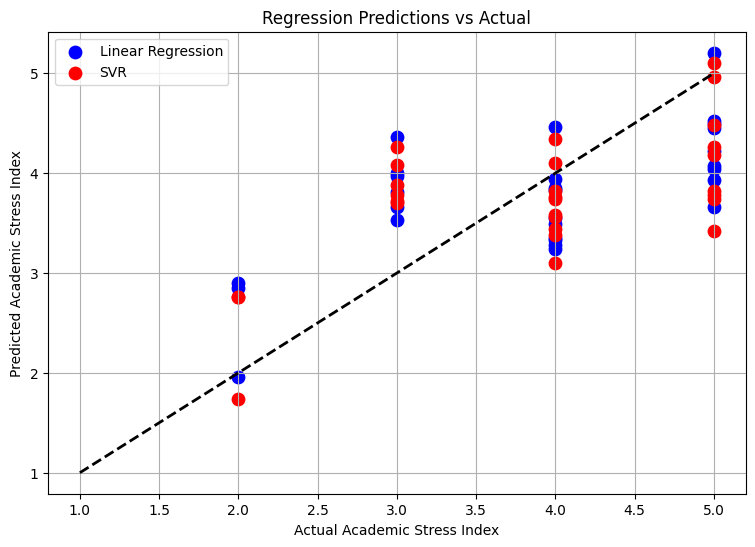

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', s=80)
plt.scatter(y_test, y_pred_svr, color='red', label='SVR', s=80)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Academic Stress Index')
plt.ylabel('Predicted Academic Stress Index')
plt.title('Regression Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()
